In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

Loading the data

In [2]:
tickers = ["^GSPC","^GDAXI","^FTSE","^N225"]
data = yf.download(tickers, period="10y")
data = data['Close'].reset_index()
data = data.set_index('Date')
data.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-03-13,6553.799805,9017.790039,1846.339966,14815.980469
2014-03-14,6527.899902,9056.410156,1841.130005,14327.660156
2014-03-17,6568.399902,9180.889648,1858.829956,14277.669922
2014-03-18,6605.299805,9242.549805,1872.250000,14411.269531
2014-03-19,6573.100098,9277.049805,1860.770020,14462.519531


In [3]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-03-13,6553.799805,9017.790039,1846.339966,14815.980469
2014-03-14,6527.899902,9056.410156,1841.130005,14327.660156
2014-03-17,6568.399902,9180.889648,1858.829956,14277.669922
2014-03-18,6605.299805,9242.549805,1872.250000,14411.269531
2014-03-19,6573.100098,9277.049805,1860.770020,14462.519531


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2603 entries, 2014-03-13 to 2024-03-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2518 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 101.7 KB


**Set the frequency to Business Day**

In [14]:
data = data.asfreq('B').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2014-03-13 to 2024-03-13
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2518 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 102.0 KB


**Missingness**

In [ ]:
# Using interpolation to impute missing values

In [4]:
data['^FTSE']

Date
2014-03-13    6553.799805
2014-03-14    6527.899902
2014-03-17    6568.399902
2014-03-18    6605.299805
2014-03-19    6573.100098
                 ...     
2024-03-07    7692.500000
2024-03-08    7659.700195
2024-03-11    7669.200195
2024-03-12    7747.799805
2024-03-13    7772.169922
Name: ^FTSE, Length: 2603, dtype: float64

In [5]:
data.isna().sum()

Ticker
^FTSE      77
^GDAXI     66
^GSPC      85
^N225     158
dtype: int64

In [6]:
data['ftse'] = data['^FTSE'].interpolate(method='linear')
data['dax'] = data['^GDAXI'].interpolate(method='linear')
data['s&p'] = data['^GSPC'].interpolate(method='linear')
data['nikkei'] = data['^N225'].interpolate(method='linear')

In [7]:
filt_data = data[['ftse','dax','s&p','nikkei']]
filt_data.head()

Ticker,ftse,dax,s&p,nikkei
Date,,,,
2014-03-13,6553.799805,9017.790039,1846.339966,14815.980469
2014-03-14,6527.899902,9056.410156,1841.130005,14327.660156
2014-03-17,6568.399902,9180.889648,1858.829956,14277.669922
2014-03-18,6605.299805,9242.549805,1872.250000,14411.269531
2014-03-19,6573.100098,9277.049805,1860.770020,14462.519531


In [9]:
filt_data.isna().sum()

Ticker
ftse      0
dax       0
s&p       0
nikkei    0
dtype: int64

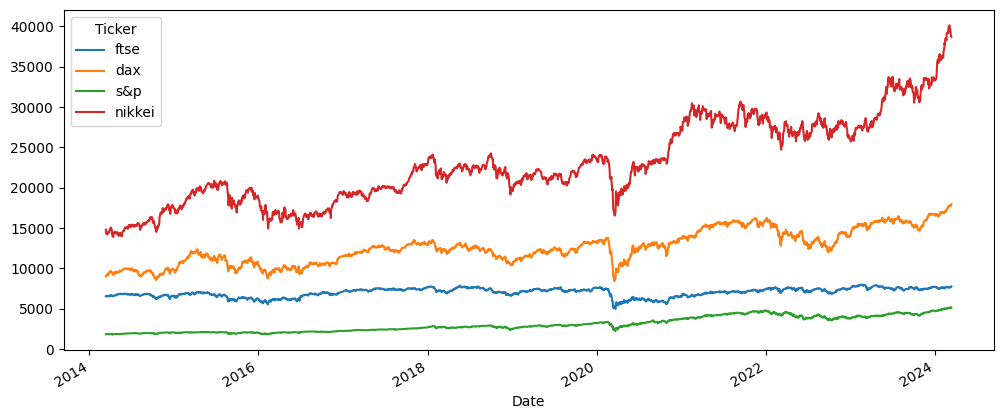

In [10]:
filt_data.plot(figsize=(12,5))
plt.show()

**- We'll proceed with nikkei**

In [13]:
df = filt_data[['nikkei']]
df.head()

Ticker,nikkei
Date,
2014-03-13,14815.980469
2014-03-14,14327.660156
2014-03-17,14277.669922
2014-03-18,14411.269531
2014-03-19,14462.519531


# **Decomposition**

A series is thought to be an aggregate or combination of these four components.

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

**Additive Model**

An additive model suggests that the components are added together as follows:

[series]y(t) = Level + Trend + Seasonality + Noise

**Linear Trend:**

If the trend component in the time series appears to be linear, meaning that it increases or decreases at a roughly constant rate, an additive model might be suitable.

**Constant Seasonal Variation:**

If the amplitude of the seasonal fluctuations remains roughly constant across different levels of the time series, an additive model is often appropriate.

**Stable Variability:**

If the variability in the data (residuals or noise) appears to be relatively constant across different levels of the time series, an additive model is a good choice.

**Equal Spacing of Seasonal Peaks and Troughs:**

If the distance between seasonal peaks and troughs remains constant, suggesting a consistent seasonal pattern, an additive model is reasonable.

**Multiplicative Model**

A multiplicative model suggests that the components are multiplied together as follows:

[series]y(t) = Level * Trend * Seasonality * Noise
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

**Non-Linear Trend:**

If the trend component exhibits a non-linear pattern, where the rate of increase or decrease accelerates or decelerates over time, a multiplicative model might be more appropriate.

**Proportional Seasonal Variation:**

If the amplitude of the seasonal fluctuations is proportional to the level of the time series, meaning that the seasonal effect grows or diminishes with the trend, a multiplicative model is often suitable.

**Changing Variability:**

If the variability in the data (residuals or noise) increases or decreases with the level of the time series, suggesting changing volatility, a multiplicative model is a good choice.

**Changing Spacing of Seasonal Peaks and Troughs:**

If the distance between seasonal peaks and troughs changes with the level of the time series, indicating a varying seasonal pattern, a multiplicative model may be appropriate.

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df = df.asfreq('B')

In [15]:
df['nikkei'].interpolate(method='linear',inplace=True)

In [16]:
df.isna().sum()

Ticker
nikkei    0
dtype: int64

In [17]:
add_decomp = seasonal_decompose(df, model="additive")

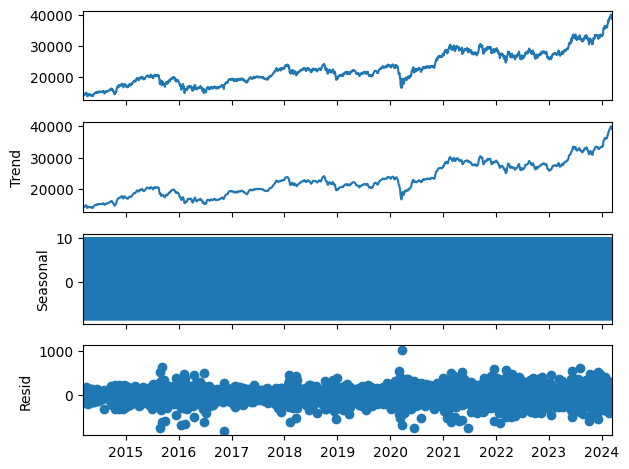

In [18]:
# Additional decomposition

add_decomp.plot()
plt.show()

In [19]:
# Multiplicative decomposition
mul_decomp = seasonal_decompose(df, model="multiplicative")

In [32]:
mul_decomp.seasonal

Date
2014-03-13    0.999827
2014-03-14    0.999596
2014-03-17    0.999943
2014-03-18    1.000368
2014-03-19    1.000266
                ...   
2024-03-07    0.999827
2024-03-08    0.999596
2024-03-11    0.999943
2024-03-12    1.000368
2024-03-13    1.000266
Freq: B, Name: seasonal, Length: 2610, dtype: float64

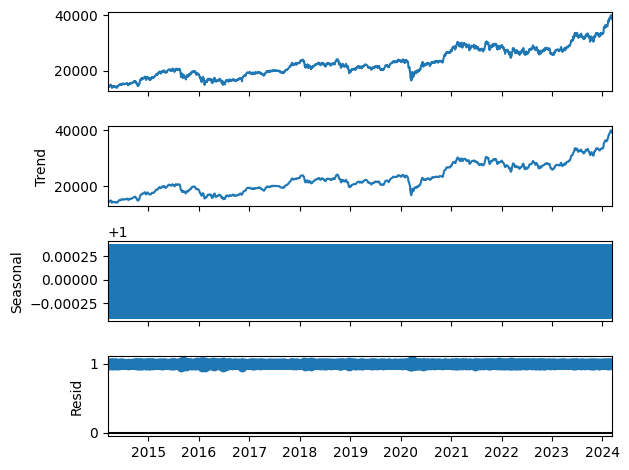

In [20]:
mul_decomp.plot()
plt.show()

# **Autocorrelation**

Analyze the relationship between a time series and its own lagged versions.

### ACF

In [21]:
import statsmodels.graphics.tsaplots as sgt

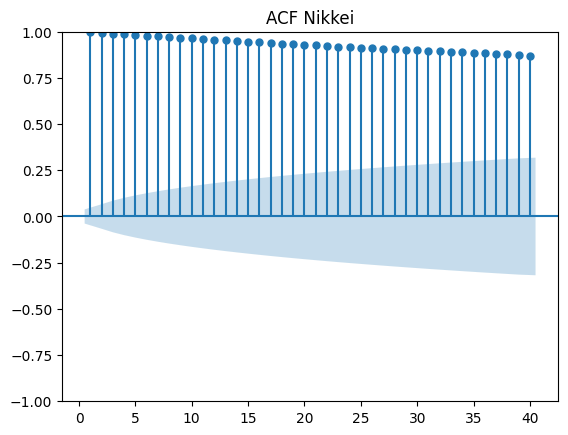

In [22]:
sgt.plot_acf(df,lags=40,zero=False)
plt.title('ACF Nikkei')
plt.show()

In [25]:
white_noise = np.random.normal(df['nikkei'].mean(),df['nikkei'].std(),size=len(df))
df['white_noise'] = white_noise

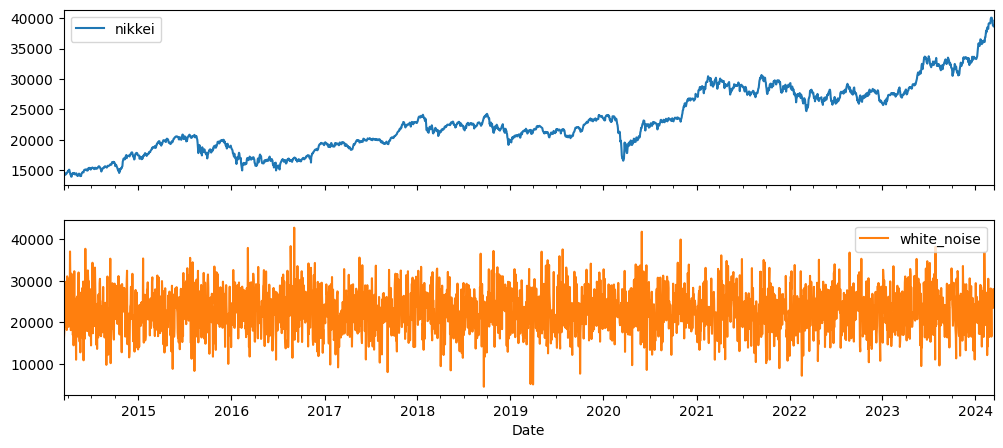

In [26]:
df[['nikkei','white_noise']].plot(figsize=(12,5),subplots=True)
plt.show()

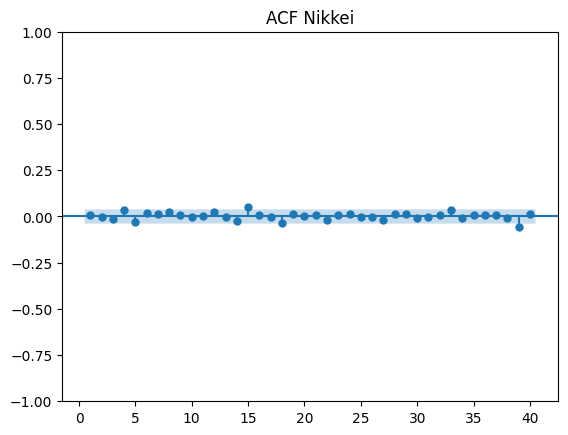

In [27]:
sgt.plot_acf(df['white_noise'],lags=40,zero=False)
plt.title('ACF Nikkei')
plt.show()

### **PACF**

- Only direct effect

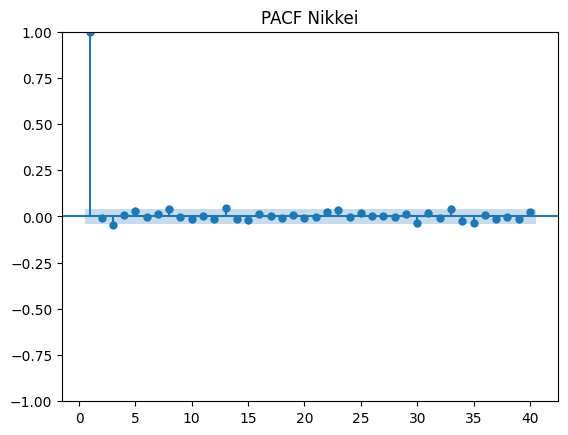

In [23]:
sgt.plot_pacf(df['nikkei'],lags=40,zero=False,method=('ols'))
plt.title("PACF Nikkei")
plt.show()

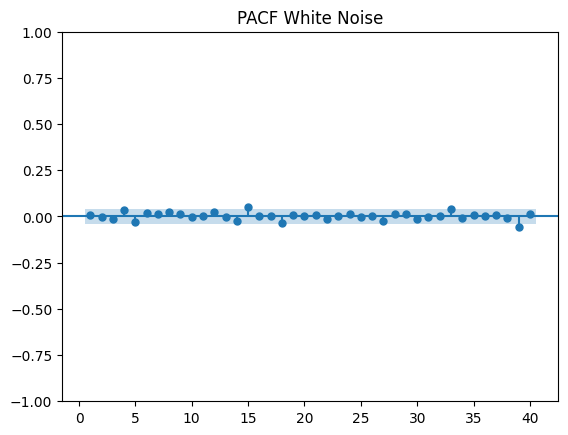

In [28]:
sgt.plot_pacf(df['white_noise'],lags=40,zero=False,method=('ols'))
plt.title("PACF White Noise")
plt.show()

**The Decomposition Residuals**

Focus: Isolates the autocorrelation patterns present in the unexplained variations of the data.

In [33]:
add_residuals = add_decomp.resid
add_residuals

Date
2014-03-13           NaN
2014-03-14           NaN
2014-03-17   -180.270081
2014-03-18     60.561435
2014-03-19    112.440623
                 ...    
2024-03-07    -55.305512
2024-03-08    298.307226
2024-03-11   -298.756019
2024-03-12           NaN
2024-03-13           NaN
Freq: B, Name: resid, Length: 2610, dtype: float64

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


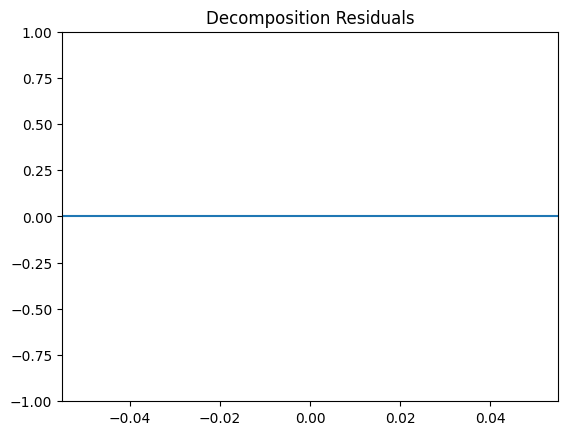

In [34]:
sgt.plot_acf(mul_decomp.resid,lags=40,zero=False)
plt.title('Decomposition Residuals')
plt.show()

No significant spikes: This is the desired outcome, suggesting the model has effectively captured the underlying patterns in the data, and the residuals are white noise (random and uncorrelated).

# **Stationarity**

 Stationarity is crucial in time series analysis because many statistical models assume that the underlying series is stationary, meaning that its statistical properties (such as mean, variance, and autocorrelation) do not change over time.

In [35]:
import statsmodels.tsa.stattools as sts

In [36]:
adf_results = sts.adfuller(df['nikkei'])
adf_results

(-0.19677725025387366,
 0.9389046719463234,
 2,
 2607,
 {'1%': -3.4328608364042927,
  '5%': -2.8626492942003465,
  '10%': -2.567360516871384},
 36087.054827532265)

In [37]:
adf_statistic = adf_results[0]
p_value = adf_results[1]
usedlag = adf_results[2]
nobs = adf_results[3]
critical_values = adf_results[4]
icbest = adf_results[5]

In [38]:
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Number of Lags Used:', usedlag)
print('Number of Observations Used:', nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value}')

ADF Statistic: -0.19677725025387366
p-value: 0.9389046719463234
Number of Lags Used: 2
Number of Observations Used: 2607
Critical Values:
	1%: -3.4328608364042927
	5%: -2.8626492942003465
	10%: -2.567360516871384


In [ ]:
siginificance_level = 0.05